## Importing Libraries

In [123]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

import matplotlib

## The Data

In [124]:
import os
print(os.getenv("Country_path"))
## Please add the Country_path  to your environment variables where CSV files are stored
var = input("Enter the Country: ")
df_Usa = pd.read_csv(os.getenv('Country_path') + '\\' + var + '_history_data.csv')
df_Usa.head()

C:\Users\manudeep\Desktop\Fall_2020\EECS_731\Project\731_Final_Project\Contries_Data
Enter the Country: Usa


,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,United States,01/01/1970,35.0,28.1,32.0,20.9,NaN,0.00,NaN,13.9,NaN,12.8,77.9,61.54,Overcast
1,United States,01/02/1970,41.1,25.1,33.2,18.1,NaN,0.00,NaN,17.2,NaN,10.0,37.5,59.52,Partially cloudy
2,United States,01/03/1970,38.0,26.9,33.6,15.5,NaN,0.05,NaN,17.2,NaN,10.5,73.3,67.34,"Rain, Partially cloudy"
3,United States,01/04/1970,33.2,21.8,27.0,10.9,NaN,0.00,NaN,17.2,NaN,9.5,0.0,51.89,Clear
4,United States,01/05/1970,44.0,20.0,30.2,11.1,NaN,0.00,NaN,15.0,NaN,9.3,47.1,65.60,Partially cloudy


In [125]:
#df_aus = pd.read_csv("../../Contries_Data/Australia_history_data.csv")

### Random Slice of Data
<hr>

In [126]:
df_Usa.sample(5)

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
7745,United States,03/17/1991,62.9,34.1,48.2,31.1,NaN,0.0,NaN,15.0,NaN,10.0,55.0,56.79,Partially cloudy
1829,United States,01/04/1975,47.0,37.1,42.8,31.6,NaN,0.0,0.0,17.2,NaN,13.5,60.8,60.33,Partially cloudy
15931,United States,09/06/2013,77.2,61.3,69.5,NaN,NaN,0.0,NaN,8.4,13.9,9.9,8.4,45.27,Clear
13867,United States,01/12/2008,53.0,42.2,46.9,39.2,NaN,0.0,NaN,11.4,NaN,9.9,82.9,55.82,Overcast
10232,United States,01/06/1998,60.5,57.8,59.0,NaN,NaN,0.0,NaN,8.1,NaN,7.9,100.0,96.42,Overcast


In [127]:
df_Usa.shape

(18545, 15)

In [128]:
#printing missing data sum
df_Usa.isnull().sum()

Name                       0
Date time                  0
Maximum Temperature        0
Minimum Temperature        0
Temperature                0
Wind Chill              9784
Heat Index             13239
Precipitation              0
Snow Depth             16653
Wind Speed                 0
Wind Gust              16022
Visibility                 0
Cloud Cover                0
Relative Humidity          0
Conditions                 0
dtype: int64

<AxesSubplot:>

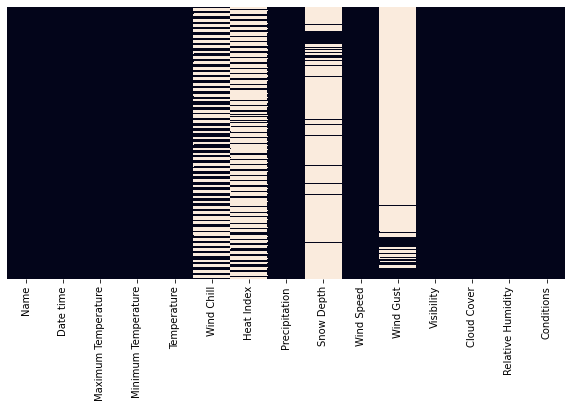

In [129]:
plt.figure(figsize=(10,5))
sns.heatmap(df_Usa.isnull(),yticklabels=False,cbar=False,cmap='rocket')

In [130]:
df_Usa.drop(columns=['Snow Depth','Heat Index','Wind Gust','Wind Chill'],inplace=True)

In [131]:
df_Usa.tail()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Conditions
18540,United States,10/28/2020,69.7,61.6,65.3,0.00,11.9,8.6,42.1,87.16,Partially cloudy
18541,United States,10/29/2020,63.5,52.9,58.3,2.25,16.4,6.4,57.1,91.80,"Rain, Partially cloudy"
18542,United States,10/30/2020,53.8,48.6,50.9,0.31,20.5,9.7,89.3,76.92,"Rain, Overcast"
18543,United States,10/31/2020,49.6,40.5,46.6,0.00,14.3,9.9,86.7,69.44,Overcast
18544,United States,11/01/2020,58.6,41.9,51.5,0.51,26.1,9.3,87.1,73.21,"Rain, Overcast"


For now, We will take Temperature and Precipitation as our Dependent variables for regression

In [132]:
#minimum value for temperature
df_Usa['Temperature'].min()

2.2

In [133]:
#maximum value for temperature
df_Usa['Temperature'].max()

93.4

In [134]:
#minimim value for temperature
df_Usa['Precipitation'].min()

0.0

In [135]:
#maximum value for precipitation
df_Usa['Precipitation'].max()

10.0

<b> Feature Description </b><br>
<hr>

`Temperature`: Average Temp (deg F)<br>
`Precipitation`: Water that is falling out of the sky, this could be rain, drizzle, snow, sleet, hail or something rarer. (Inches)<br>
`Wind Chill` - the cooling effect of wind blowing on a surface(Temp a human feels becuase of heat is loss from the exposed skin)	(deg F)<br>
`Heat Index` - The Heat Index is a measure of how hot it really feels when relative humidity is factored in with the actual air temperature. (deg F)<br>
`Snow Depth` -  Determine the depth of the new and old snow remaining on the ground at observation time. (Inches)<br>
`Wind Speed` - Speed of wind in (Miles/hour)<br>
`Wind Gust` -  brief increase in the speed of the wind (Miles/hour) <br>
`Visibility` - visibility is a measure of the distance at which an object or light can be clearly discerned (Miles)<br>
`Cloud Cover` - fraction of the sky obscured by clouds when observed from a particular location ()<br>
`Relative Humidity` - Relative humidity is the ratio of the partial pressure of water vapor to the equilibrium vapor pressure of water at a given temperature<br>
`Condition` - Condition of the whole day.

In [136]:
#ToDO - Update feature details

In [137]:
#Todo:How Windspeed is Effecting Temperature
#Todo: How Temperature affects visibility
#Todo: How Humidity affects Temperature
#Todo: How Cloud cover is affected by Temperature

### 3 Feature Engineering

####  Variance Threshold For Temperature

In [138]:
# Using Variance threshold to select variant features and drop constant features for temperature
X=df_Usa.drop(columns=['Temperature','Name','Date time','Maximum Temperature','Minimum Temperature','Conditions'],axis=1)
Y=df_Usa['Temperature']
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)

VarianceThreshold(threshold=0)

In [139]:
X.head()

,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity
0,0.00,13.9,12.8,77.9,61.54
1,0.00,17.2,10.0,37.5,59.52
2,0.05,17.2,10.5,73.3,67.34
3,0.00,17.2,9.5,0.0,51.89
4,0.00,15.0,9.3,47.1,65.60


In [140]:
var_thres.get_support()

array([ True,  True,  True,  True,  True])

Variance threshold doesn't give much information as there are no columns with zero variance

####  Variance Threshold For Precipitation

In [141]:
# Using Variance threshold to select variant features and drop constant features for Precipitation
X=df_Usa.drop(columns=['Precipitation','Name','Date time','Conditions'],axis=1)
Y=df_Usa['Precipitation']
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)

VarianceThreshold(threshold=0)

In [142]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

Same as with Temperature, Variance threshold doesn't give much information for Precipitation as there are no columns with zero variance

### 3.2 Feature Selection using pearson correlation coefficient

Now let's check relevant features for the model on the basis of correlation with dependent variable Temperature and Precipitation

<AxesSubplot:>

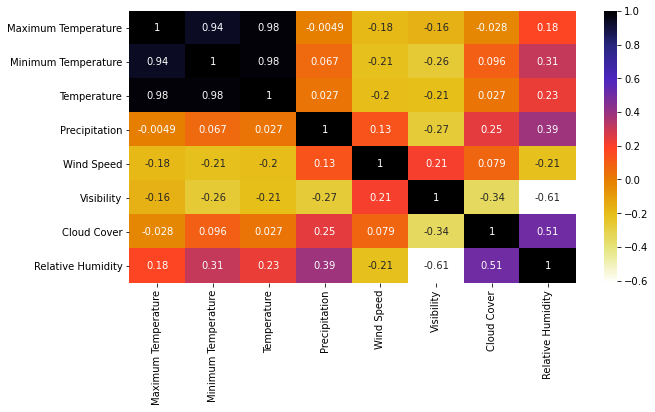

In [144]:
plt.figure(figsize=(10,5))
c= df_Usa.corr()
sns.heatmap(c,cmap='CMRmap_r',annot=True)

Higher the value with the other variable, higher the correlation. Maximum Temperature and Minimum Temperature are highly correalted with Each other and with temperature , but prediction would be obvious in that case, 

Also, for `Temperature` which is one of our dependent varaiable, Temperature is inversely correlated with Visibility and windspeed, some correlation with Relative humidity, almost negligible correlation with Precipitation

For `Precipitation`, It is not highly correlated with any other feature, but slightly correlated with Cloud cover and Relative Humidity and almost inverse correlation with Maximum Temperature, moderate negative correlation with visibility

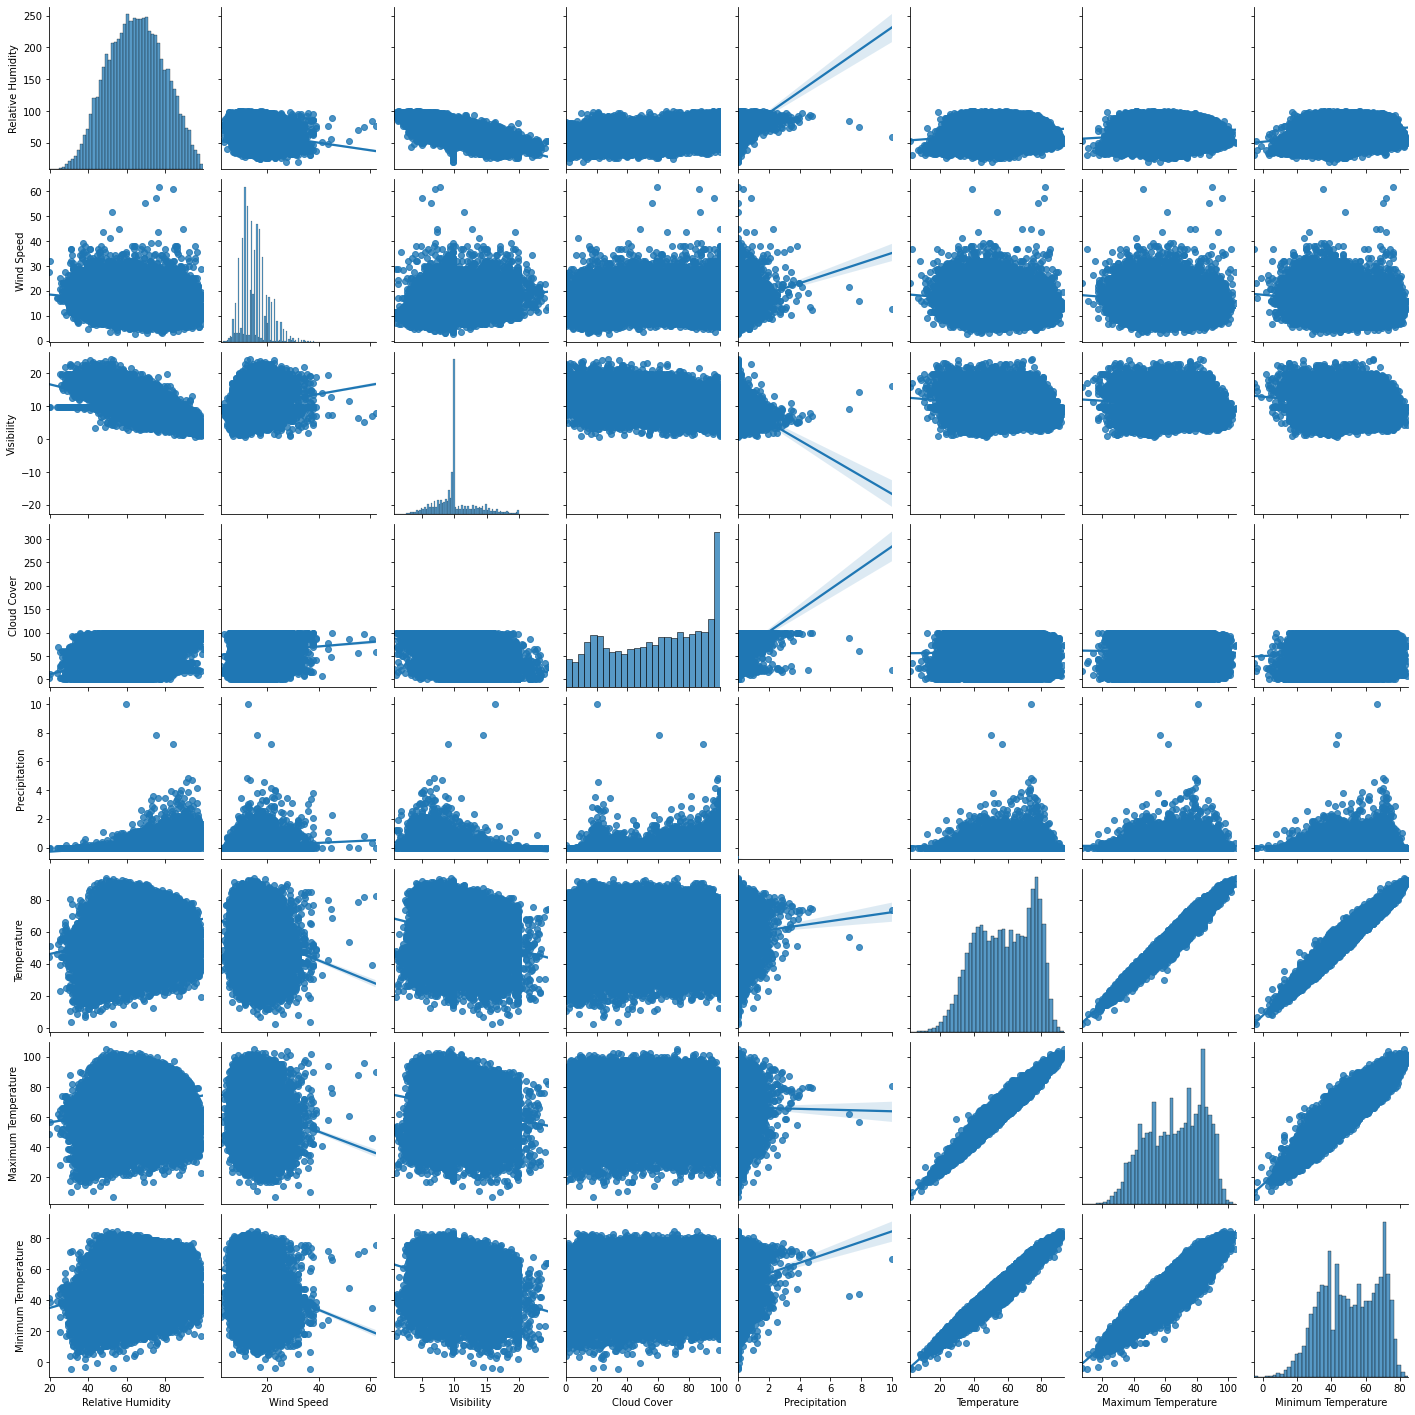

In [145]:
#Taking Temperature,Precipitation as traget and plotting a pairplot of type regression
sns.pairplot(data=df_Usa[['Relative Humidity','Wind Speed','Visibility','Cloud Cover','Precipitation','Temperature','Maximum Temperature',
                         'Minimum Temperature']],kind='reg')

For Temperature, We can see Maximum Temperature, Minimum Temperature and Temperature have a linear relationship, with respect to other features , we can see there is no linear relation expect for Relative Humidity , it is inverse

For Precipitation, we can see majority of values are not correlated in any way. It lies in the range of 0-2 for many feature values.There is no obvious relation between any features and precipitation.

#### 3.3 Using Feature Transformation for conditions

In [147]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
df_Usa['Conditions']= label_encoder.fit_transform(df_Usa['Conditions'])

In [148]:
df_Usa.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Conditions
0,United States,01/01/1970,35.0,28.1,32.0,0.00,13.9,12.8,77.9,61.54,1
1,United States,01/02/1970,41.1,25.1,33.2,0.00,17.2,10.0,37.5,59.52,2
2,United States,01/03/1970,38.0,26.9,33.6,0.05,17.2,10.5,73.3,67.34,5
3,United States,01/04/1970,33.2,21.8,27.0,0.00,17.2,9.5,0.0,51.89,0
4,United States,01/05/1970,44.0,20.0,30.2,0.00,15.0,9.3,47.1,65.60,2


## Regression

(array([  10.,  118.,  630., 1942., 3039., 2823., 2768., 3176., 3595.,
         444.]),
 array([ 2.2 , 11.32, 20.44, 29.56, 38.68, 47.8 , 56.92, 66.04, 75.16,
        84.28, 93.4 ]),
 <BarContainer object of 10 artists>)

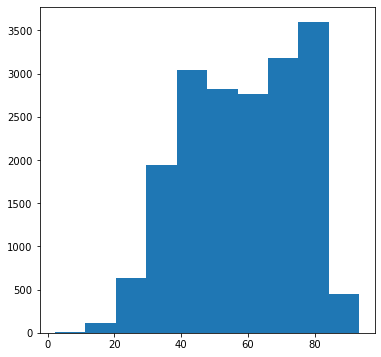

In [149]:
plt.hist(df_Usa['Temperature'])

(array([1.8045e+04, 4.1700e+02, 5.6000e+01, 2.0000e+01, 4.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

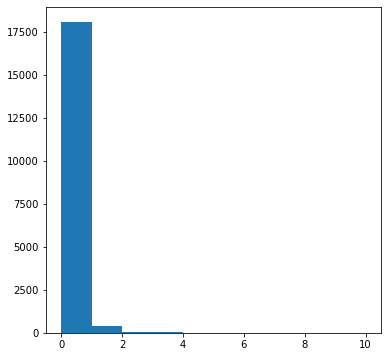

In [150]:
plt.hist(df_Usa['Precipitation'])

#### Segregating variables: Independent and Dependent Variables for Temperature

In [151]:
X_temp=df_Usa.drop(columns=['Maximum Temperature','Minimum Temperature','Temperature',
                            'Name','Date time','Precipitation'],axis=1)
Y_temp=df_Usa.Temperature

#### Importing the train test split function for Temperature

In [152]:
from sklearn.model_selection import train_test_split
train_X_temp,test_X_temp,train_y_temp,test_y_temp = train_test_split(X_temp,Y_temp)

In [153]:
train_X_temp.head()

,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Conditions
10178,15.0,10.5,100.0,63.30,4
16829,12.8,7.9,81.7,84.98,4
6268,24.2,10.0,83.8,78.36,4
7340,20.8,15.4,0.0,61.05,0
10611,12.8,9.9,55.3,57.09,2


In [154]:
train_y_temp.head()

10178    38.8
16829    50.5
6268     57.8
7340     38.4
10611    41.8
Name: Temperature, dtype: float64

In [155]:
#getting the shape for training data
train_X_temp.shape

(13908, 5)

In [156]:
train_y_temp.shape

(13908,)

In [157]:
#getting the shape for test data
test_X_temp.shape

(4637, 5)

### 1. Implementing Linear Regression

In [158]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import math

In [159]:
lr = LR(normalize=True)
lr.fit(train_X_temp,train_y_temp)
y_pred_1=lr.predict(test_X_temp)

In [160]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_X_temp)
k = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(k) )

Training Root Mean Squared Error 15.843355401199767


In [161]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_X_temp)
k = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(k) )

Test Root Mean Squared Error 15.699201492209115


In [162]:
# Arranging and calculating the Residuals for score1
residuals = pd.DataFrame({
    'fitted values' : test_y_temp,
    'predicted values' : y_pred_1,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
764,31.5,50.985265,-19.485265
8720,56.7,59.917582,-3.217582
6295,59.5,58.421110,1.078890
5191,50.7,61.897270,-11.197270
11436,59.6,62.659225,-3.059225


### Ridge Regression

In [163]:
from sklearn import linear_model
model=linear_model.Ridge()
model.fit(train_X_temp,train_y_temp)
y_predict=model.predict(test_X_temp)

In [164]:
# Predicting over the Train Set and calculating error
train_predict = model.predict(train_X_temp)
ridge_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(ridge_train_error) )

Training Root Mean Squared Error 15.843355401522007


In [165]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_X_temp)
ridge_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(ridge_test_error) )

Test Root Mean Squared Error 15.699201492209115


### Residual Plot in Ridge Regression

Text(0.5, 1.0, 'Residual plot in Ridge Regression')

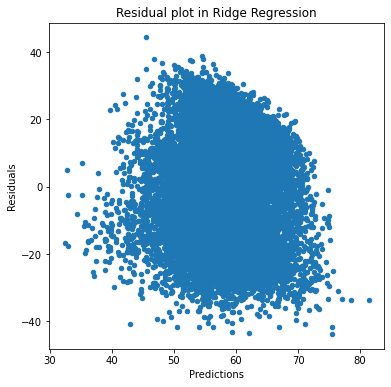

In [166]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual plot in Ridge Regression")

### Knn Algorithm

In [167]:
from sklearn.preprocessing import StandardScaler

x_scaled=StandardScaler()
train_X_temp[['Wind Speed','Relative Humidity']] = x_scaled.fit_transform(train_X_temp[['Wind Speed','Relative Humidity']])

x_test_scaled= StandardScaler()
test_X_temp[['Wind Speed','Relative Humidity']]=x_test_scaled.fit_transform(test_X_temp[['Wind Speed','Relative Humidity']])

In [168]:
from sklearn import neighbors
n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(train_X_temp,train_y_temp)
y1_knn=knn.predict(test_X_temp)

In [169]:
# Predicting over the Train Set and calculating error
train_predict = knn.predict(train_X_temp)
knn_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(knn_train_error) )

Training Root Mean Squared Error 12.43978179107218


In [170]:
# Predicting over the Test Set and calculating error
test_predict = knn.predict(test_X_temp)
knn_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(knn_test_error) )

Test Root Mean Squared Error 15.228747700438618


### Residual plot in KNN

Text(0.5, 1.0, 'Residual plot in KNN Regression')

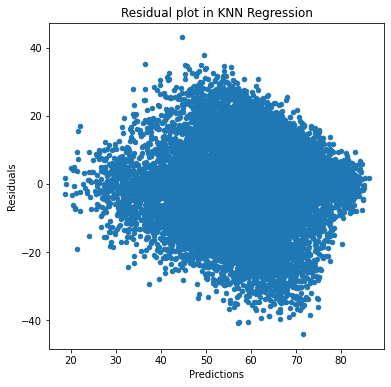

In [171]:
preds = pd.DataFrame({"preds":knn.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual plot in KNN Regression")

### Bayessian Regression

In [172]:
b_reg = linear_model.BayesianRidge()
b_reg.fit(train_X_temp,train_y_temp)
y1_reg = b_reg.predict(test_X_temp)

In [173]:
# Predicting over the Train Set and calculating error
train_predict = b_reg.predict(train_X_temp)
bayesian_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(bayesian_train_error) )

Training Root Mean Squared Error 15.843371169987023


In [174]:
# Predicting over the Test Set and calculating error
test_predict = b_reg.predict(test_X_temp)
bayesian_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(bayesian_test_error) )

Test Root Mean Squared Error 15.699364189958926


### Decision Tree Regressor

In [175]:
from sklearn import tree
dec = tree.DecisionTreeRegressor(max_depth=1)
dec.fit(train_X_temp,train_y_temp)

DecisionTreeRegressor(max_depth=1)

In [176]:
# Predicting over the Train Set and calculating error
train_predict = dec.predict(train_X_temp)
dec_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(dec_train_error) )

Training Root Mean Squared Error 16.106280298573605


In [177]:
# Predicting over the Test Set and calculating error
test_predict = dec.predict(test_X_temp)
dec_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(dec_test_error) )

Test Root Mean Squared Error 15.939135722829356


### Residual Plot in Decision Tree Regressor

Text(0.5, 1.0, 'Residual plot in Decision Tree Regression')

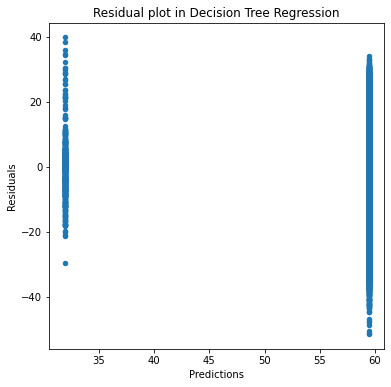

In [183]:
preds = pd.DataFrame({"preds":dec.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual plot in Decision Tree Regression")

### 3. Support Vector Regression for Temperature

#### Pre processing features

In [184]:
from sklearn.svm import SVR

model1=SVR(kernel="linear")

model1.fit(train_X_temp,train_y_temp)
pred1=model1.predict(test_X_temp)

In [185]:
# Predicting over the Train Set and calculating error
train_predict = model1.predict(train_X_temp)
svm_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(svm_train_error) )

Training Root Mean Squared Error 15.944326924970804


In [186]:
# Predicting over the Test Set and calculating error
test_predict = model1.predict(test_X_temp)
svm_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(svm_test_error) )

Test Root Mean Squared Error 15.795145720590938


### Residual Plot for Support Vector Machine

Text(0.5, 1.0, 'Residual plot in Support Vector Regression')

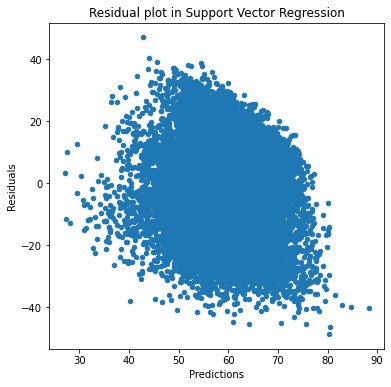

In [187]:
preds = pd.DataFrame({"preds":model1.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual plot in Support Vector Regression")

### Getting the Graph for all Models RMSE

In [188]:
train_error=[ridge_train_error,knn_train_error,bayesian_train_error,dec_train_error,svm_train_error]
test_error=[ridge_test_error,knn_test_error,bayesian_test_error,dec_test_error,svm_test_error]

col={'Train RMSE':[math.sqrt(i) for i in train_error],
         'Test RMSE':[math.sqrt(i) for i in test_error]}
models=['Ridge Regression','K-Nearest','Bayesian Regression','Decision Tree','SVM']
df=pd.DataFrame(data=col,index=models)
df

,Train RMSE,Test RMSE
Ridge Regression,15.843355,15.699201
K-Nearest,12.439782,15.228748
Bayesian Regression,15.843371,15.699364
Decision Tree,16.106280,15.939136
SVM,15.944327,15.795146


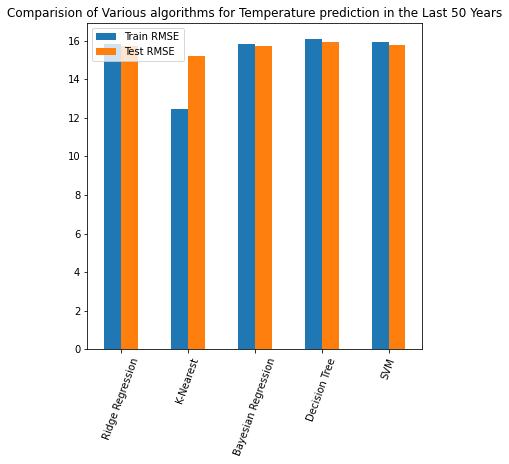

In [189]:
df.plot(kind='bar')
plt.xticks(rotation=70)
plt.title("Comparision of Various algorithms for Temperature prediction in the Last 50 Years")
plt.show()

#### Segregating variables: Independent and Dependent Variables for Precipitation

In [190]:
X_prec=df_Usa.drop(columns=['Precipitation','Conditions','Name','Date time'],axis=1)
Y_prec=df_aus.Precipitation

In [191]:
X_prec.head()

,Maximum Temperature,Minimum Temperature,Temperature,Wind Speed,Visibility,Cloud Cover,Relative Humidity
0,35.0,28.1,32.0,13.9,12.8,77.9,61.54
1,41.1,25.1,33.2,17.2,10.0,37.5,59.52
2,38.0,26.9,33.6,17.2,10.5,73.3,67.34
3,33.2,21.8,27.0,17.2,9.5,0.0,51.89
4,44.0,20.0,30.2,15.0,9.3,47.1,65.60


#### Importing the train test split function for Precipitation

In [192]:
from sklearn.model_selection import train_test_split
train_X_prec,test_X_prec,train_y_prec,test_y_prec = train_test_split(X_prec,Y_prec)

### 1. Implementing Linear Regression

In [112]:
lr = LR(normalize=True)
lr.fit(train_X_prec,train_y_prec)
y_pred_1=lr.predict(test_X_prec)

In [113]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_X_prec)
k = mse(train_predict, train_y_prec)
print('Training Mean Squared Error', k )

Training Mean Squared Error 0.06182241198212998


In [114]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_X_prec)
k = mse(test_predict, test_y_prec)
print('Test Mean Squared Error', k )

Test Mean Squared Error 0.04689303782846754


### 2. Random Forest Regressor for Precipitation

In [115]:
from sklearn.ensemble import RandomForestRegressor
RM=RandomForestRegressor(random_state=56)
RM.fit(train_X_prec,train_y_prec)
y_pred_r1=RM.predict(test_X_prec)

#### Evaluating Algorithm

In [116]:
print('Random Forest Mean Absolute Error:', metrics.mean_absolute_error(test_y_prec, y_pred_r1))  
print('Random Forest Mean Squared Error:', metrics.mean_squared_error(test_y_prec, y_pred_r1))  
print('Random Forest Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y_prec, y_pred_r1)))

Random Forest Mean Absolute Error: 0.05658367673992673
Random Forest Mean Squared Error: 0.05070452557005494
Random Forest Root Mean Squared Error: 0.22517665414082105


### 3. Support Vector Regression for Precipitation

#### Pre processing features

In [117]:
from sklearn.preprocessing import StandardScaler

x_scaled=StandardScaler()
x_train = x_scaled.fit_transform(train_X_prec)

x_test_scaled= StandardScaler()
x_test=x_test_scaled.fit_transform(test_X_prec)

In [118]:
from sklearn.svm import SVR

model1=SVR(kernel="linear")

model1.fit(x_train,train_y_prec)
pred1=model1.predict(x_test)

print(pred1)

[0.12354932 0.04342051 0.0585621  ... 0.03942561 0.13311022 0.05297337]


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

print("Mean squared error is : ",mean_squared_error(test_y_prec,pred1))
print("r2 score is : ",r2_score(test_y_prec,pred1))